<a href="https://colab.research.google.com/github/leiyi-ihb/ColabPractics/blob/main/B_practices/keras_example02_%E5%81%9A%E4%B8%AA%E7%AE%80%E5%8D%95%E7%9A%84%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E8%AE%AD%E7%BB%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#ly:2022-10-29
#From: B站，人工智能前沿技术-2.2
# 模型导入：一般都会导入这几个层
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

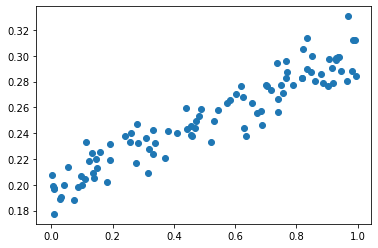

In [8]:
x_data = np.random.rand(100) # 生成100个随机点
noise = np.random.normal(0, 0.01, x_data.shape) #添加噪音
y_data = x_data * 0.1 + 0.2 + noise # 如果没有噪音， 就会产生很规律的点

# 显示随机点
plt.scatter(x_data, y_data)
plt.show()

loss: 0.6146726608276367
loss: 0.035540029406547546
loss: 0.0076732877641916275
loss: 0.0017407559789717197
loss: 0.00047778422595001757
loss: 0.0002089106710627675
loss: 0.00015166985394898802
w: [[0.11724642]] b: [0.19074257]
4/4 [==============================] - 0s 3ms/step


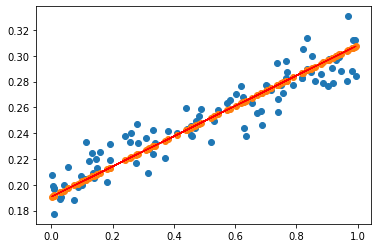

In [10]:
model = Sequential()
model.add(Dense(units=1, input_dim=1)) #在模型中添加一个全连接层

#编译模型
model.compile(optimizer='sgd', loss='mse')

#训练300个批次
for step in range(3001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果**：可以发现，权值和偏置值分别为0.117和0.19，这同原来函数（y_data = x_data * 0.1 + 0.2 + noise）中的0.1和0.2是有差别的，这可能时因为噪音noice造成的  
下面通过去掉噪音来看看结果

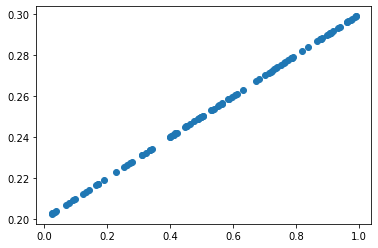

loss: 0.5338944792747498
loss: 0.032893527299165726
loss: 0.009661545976996422
loss: 0.002837814623489976
loss: 0.0008335316088050604
loss: 0.00024482604931108654
loss: 7.191060285549611e-05
w: [[0.12949854]] b: [0.18263292]
4/4 [==============================] - 0s 2ms/step


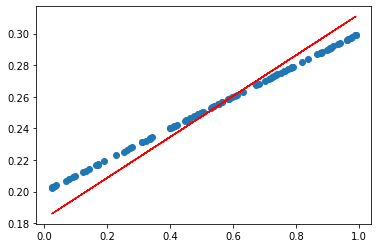

In [11]:
x_data = np.random.rand(100) # 生成100个随机点
noise = np.random.normal(0, 0.01, x_data.shape) #添加噪音
y_data = x_data * 0.1 + 0.2 # 如果没有噪音， 就会产生很规律的点

# 显示随机点
plt.scatter(x_data, y_data)
plt.show()

model = Sequential()
model.add(Dense(units=1, input_dim=1)) #在模型中添加一个全连接层

#编译模型
model.compile(optimizer='sgd', loss='mse')

#训练300个批次
for step in range(3001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果：**可以发现，权值和偏置值分别为0.12和0.18，这同原来函数（y_data = x_data * 0.1 + 0.2 + noise）中的`0.1和0.2还是有差别的`，有两个原因：1、训练不到位；2、这就是预测和现实的差别，就算训练到最佳了，也不能肯定就同原来的完全一样  
我们能解决的就只有第一个问题。对于第一个，就可以通过调整训练来尽量避免，既调整训练使得模型达到最佳。  
如下，我们尝试增加模型训练次数【由3000次变为5000次】，来看看结果

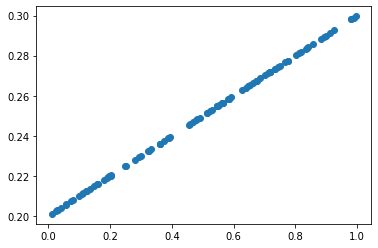

loss: 0.09164370596408844
loss: 0.011897388845682144
loss: 0.0034794851671904325
loss: 0.0010176004143431783
loss: 0.0002976047107949853
loss: 8.703664207132533e-05
loss: 2.545455026847776e-05
loss: 7.444419225066667e-06
loss: 2.1771663796243956e-06
loss: 6.367204150592443e-07
loss: 1.8621597064338857e-07
w: [[0.10153969]] b: [0.19919188]
4/4 [==============================] - 0s 3ms/step


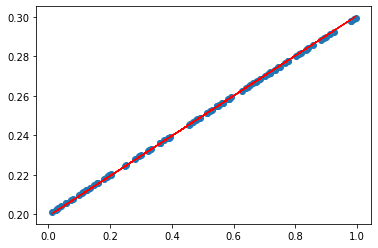

In [12]:
x_data = np.random.rand(100) # 生成100个随机点
noise = np.random.normal(0, 0.01, x_data.shape) #添加噪音
y_data = x_data * 0.1 + 0.2 # 如果没有噪音， 就会产生很规律的点

# 显示随机点
plt.scatter(x_data, y_data)
plt.show()

model = Sequential()
model.add(Dense(units=1, input_dim=1)) #在模型中添加一个全连接层

#编译模型
model.compile(optimizer='sgd', loss='mse')

#训练5000个批次
for step in range(5001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果：**可以发现，权值和偏置值分别为0.10和0.19，这相比于上面可以发现权值和偏执值更加接近于现实的`0.1和0.2还是有差别的`，说明我们的模型得到了优化。  
再来训练4000次，看看结果

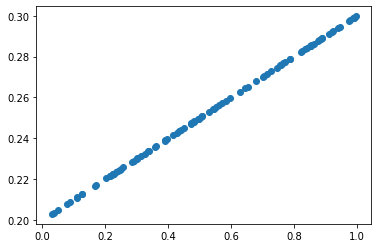

loss: 0.10790608078241348
loss: 0.011567418463528156
loss: 0.003356108907610178
loss: 0.0009737247019074857
loss: 0.00028251134790480137
loss: 8.196645649150014e-05
loss: 2.378153112658765e-05
loss: 6.89974831402651e-06
loss: 2.001853772526374e-06
w: [[0.10493492]] b: [0.19718182]
4/4 [==============================] - 0s 3ms/step


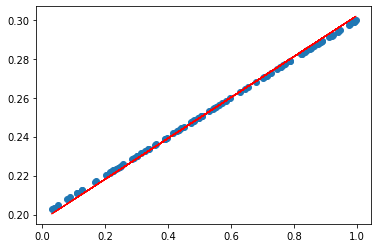

In [13]:
x_data = np.random.rand(100) # 生成100个随机点
noise = np.random.normal(0, 0.01, x_data.shape) #添加噪音
y_data = x_data * 0.1 + 0.2 # 如果没有噪音， 就会产生很规律的点

# 显示随机点
plt.scatter(x_data, y_data)
plt.show()

model = Sequential()
model.add(Dense(units=1, input_dim=1)) #在模型中添加一个全连接层

#编译模型
model.compile(optimizer='sgd', loss='mse')

#训练4000个批次
for step in range(4001):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果：**可以发现，比训练5000次的时候，效果差一些
再来训练3500次，看看结果

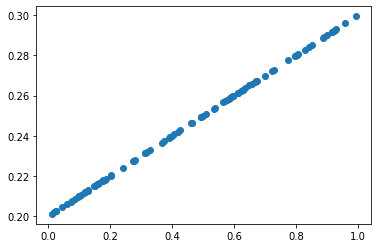

loss: 0.3848879933357239
loss: 0.03339982405304909
loss: 0.008700739592313766
loss: 0.0022665653377771378
loss: 0.000590445299167186
loss: 0.0001538127107778564
loss: 4.006876770290546e-05
loss: 1.043797965394333e-05
w: [[0.11116389]] b: [0.19450003]
4/4 [==============================] - 0s 3ms/step


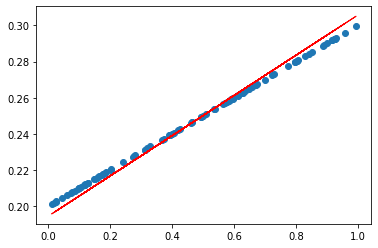

In [14]:
x_data = np.random.rand(100) # 生成100个随机点
noise = np.random.normal(0, 0.01, x_data.shape) #添加噪音
y_data = x_data * 0.1 + 0.2 # 如果没有噪音， 就会产生很规律的点

# 显示随机点
plt.scatter(x_data, y_data)
plt.show()

model = Sequential()
model.add(Dense(units=1, input_dim=1)) #在模型中添加一个全连接层

#编译模型
model.compile(optimizer='sgd', loss='mse')

#训练3500个批次
for step in range(3501):
  #每次训练一个批次
  cost = model.train_on_batch(x_data, y_data) #这里每次batch都将所有数据进行训练
  #没500个batch，打印一次cost值
  if step % 500 == 0:
    print("loss:", cost)

#打印权值和偏置值
w, b = model.layers[0].get_weights() #这里的0表示第一层，我们这里只有一层
print("w:", w, "b:", b)

# x_data输入网络中，得到预测值y_pred
y_pred= model.predict(x_data)

# 显示随机点
plt.scatter(x_data, y_data)

# 显示预测结果
plt.plot(x_data, y_pred, "r-", lw=1)
# plt.scatter(x_data, y_pred)
plt.show()

**结果：**可以发现，比训练4000次的时候，效果又更差一些了。`说明模型的训练次数（深度），影响了模型的效果`